# BAN 612 - Spring 2022

#### GROUP 6 - 
#### Rohit Kumar 
#### Om Sai Rusheel Kacham 	
#### Bhavana Atluri 	
#### Sonia Sunny	
#### Sravan allaparthi	
#### Prashanth Mandapati 	
	

### Data Collection

In [1]:
# Importing Libraries

from bs4 import BeautifulSoup as BS
from urllib.request import urlopen
import requests
import pandas as pd
import numpy as np

In [2]:
# Request Headers

req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}

In [3]:
# Initialising the variables

base_url = "https://www.zillow.com/homes/"  
area_code_mapping = {
    'Contra Costa' : 'contra-costa-county-ca',
    'Marina' : 'marina-ca',
    'Napa' : 'napa-ca',
    'San Francisco' : 'san-francisco-ca',
    'San Jose':'san-jose-ca',
    'San Mateo' : 'san-mateo-ca',
    'Santa Clara' : 'santa-clara-ca',
    'Solano' : 'solano-county-ca',
    'Sonoma' : 'sonoma-ca'
    
 }

df = pd.DataFrame()

In [50]:
# URL construction

def construct_url(base_url,area_code,page_num):
    
    '''
    Returns the URL to scrap given the 'base URL', 'area code' and 'page number'
    
    '''
    
    return base_url + area_code + '/' + str(page_num) + '_p'

In [51]:
# First Address

def first_address(base_url,area_code,page_num,req_headers):
    
    '''
    returns first address from the page given the 'base URL', 'area code', 'page number' and 'request headers'
    
    '''
    
    r = requests.get(construct_url(base_url,area_code,page_num) , headers=req_headers)
    soup = BS(r.content, 'html.parser')
    
    return str(soup.find(class_="list-card-details"))
    

- Scarping through all the 9 `Counties` in the `Bay Area` :
     1. Contra Costa
     2. Marina
     3. Napa
     4. San Francisco
     5. San Jose
     6. San Mateo
     7. Santa Clara
     8. Solano
     9. Sonoma


In [6]:
# intialisiing the Dataframe to store the data while we scraping
ans = pd.DataFrame()
properties = []

# Scarping for each of the county in the Bay Area
for area_name,area_code in area_code_mapping.items():
    print(area_name) # to get an idea on progress while we run
    prev_data = ""
    page_num = 1
    
    r = requests.get(construct_url(base_url,area_code,page_num) , headers=req_headers)
    soup = BS(r.content, 'html.parser')
    first_add = str(soup.find(class_="list-card-details"))
    
    # scrap the area till last page
    while prev_data != first_address(base_url,area_code,page_num,req_headers) :
    
        print(page_num)
        
        r = requests.get(construct_url(base_url,area_code,page_num) , headers=req_headers)
        soup = BS(r.content, 'html.parser')
    
    
        url = []


        for link in soup.find_all(class_='list-card-link list-card-link-top-margin'):
            url.append(link.attrs['href'])
            
        df = pd.DataFrame()
        
        df['URL'] = url
        
        df['County'] = area_name
        
        ans = pd.concat([ans,df])
        
        prev_data = str(soup.find(class_="list-card-details"))
        
        page_num = page_num + 1
            

Contra Costa
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
Marina
1
Napa
1
2
3
4
5
San Francisco
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
San Jose
1
2
3
4
5
6
7
8
9
10
11
San Mateo
1
2
3
Santa Clara
1
2
3
Solano
1
2
3
4
5
6
7
8
9
10
Sonoma
1
2
3


In [7]:
# Dropping duplicates

#ans.drop_duplicates(inplace=True)

In [8]:
# Reset Indexes

ans.reset_index(drop=True, inplace=True)

In [9]:
def get_address(title):
    
    '''
    returns the 'Title' of the page given the 'URL'
    '''
    
    sp = title.split(' | ')
    if len(sp) != 0 :
        
        attr = sp[0].split(',')
        
        address = attr[0]
        #county = attr[1].strip()
        zip_code = attr[-1].split(" ")[-1]
        
    return [address,zip_code]  


In [11]:
# Property & Zillow Property & Zestimates Stats

# intialising the variables to collect the attributes
address = []
county = []
zip_code = []

prop_stats = []

prices = []

zillow_stats = []
zestimates = []

c = 0
for prop_link in ans['URL']:
    r = requests.get(prop_link, headers=req_headers)
    soup = BS(r.content, 'html.parser')
    print(c,prop_link) # to get the progress and helpful in debugging
    
    attr = get_address(soup.title.text)
    
    address.append(attr[0])
    zip_code.append(attr[-1])
                
    prop_spec = []
    
    if len(soup.find_all(class_='hdp__sc-rfpg3m-0 bqcSTm')[:3]) != 3:
        
        prop_spec.extend(['0 bd','0 ba','0 sqft'])
    
    else:
        for attr in soup.find_all(class_='hdp__sc-rfpg3m-0 bqcSTm')[:3]:

            prop_spec.append(attr.text)
    prop_stats.append(prop_spec)
    
            
    
    
    
    
    #Prices
    
    try:
        prices.append(soup.find(class_ = 'Text-c11n-8-62-5__sc-aiai24-0 hdp__sc-b5iact-0 frfoXM fAzOKk').text)
        
    except:
        prices.append('0')
        
    prop_stat = []
    ezest = []
    
    # Zillow stats
    for prop in soup.find_all(class_ = "hdp__sc-qe1dn6-1 kxkPKM"):
        
        for attr in prop.find_all(class_='Text-c11n-8-62-5__sc-aiai24-0 eqgHgX'):
            prop_stat.append(attr.text)
    zillow_stats.append(prop_stat)
    
    
    
    # Zestimates
    for zestimate in soup.find_all(class_ = "Text-c11n-8-62-5__sc-aiai24-0 kHJjYI"):
        ezest.append(zestimate.text)
        
    zestimates.append(ezest)
    
    c = c +1
    
       

0 https://www.zillow.com/homedetails/111-S-Lake-Dr-Antioch-CA-94509/18305776_zpid/
1 https://www.zillow.com/homedetails/810-W-6th-St-Antioch-CA-94509/18306132_zpid/
2 https://www.zillow.com/homedetails/1021-Morning-Glory-Way-Oakley-CA-94561/72552429_zpid/
3 https://www.zillow.com/homedetails/4003-Crescent-Ct-Antioch-CA-94509/72555732_zpid/
4 https://www.zillow.com/homedetails/3625-Mountaire-Dr-Antioch-CA-94509/18309592_zpid/
5 https://www.zillow.com/homedetails/7020-Molluk-Way-Clayton-CA-94517/18357264_zpid/
6 https://www.zillow.com/homedetails/2414-Branchwood-Ct-Richmond-CA-94806/18502384_zpid/
7 https://www.zillow.com/homedetails/3020-Elizabeth-Ln-Antioch-CA-94509/18311356_zpid/
8 https://www.zillow.com/homedetails/81-Schooner-Ct-Richmond-CA-94804/72552480_zpid/
9 https://www.zillow.com/community/orchard-trails/2067247056_zpid/
10 https://www.zillow.com/homedetails/1881-Gateway-Dr-Oakley-CA-94561/18292253_zpid/
11 https://www.zillow.com/homedetails/524-4th-St-Rodeo-CA-94572/18481711_

* Total `646` (more than 600) Properties data is scraped intially.

In [20]:
ans['Address'] = address
ans['Zip Code'] = zip_code

In [13]:
bedrooms = []
bathrooms = []
area = []

for attr in prop_stats:
    
    bedrooms.append(attr[0].split()[0])
    bathrooms.append(attr[1].split()[0])
    area.append(attr[2].split()[0])
    
    
ans['Bedrooms'] = bedrooms
ans['Bathrooms'] = bathrooms
ans['Area (sqft)'] = area

In [14]:
time_on_zillow = []
views = []
saves = []
zestimate_price = []
estimated_monthly_cost = []


for stat in zillow_stats:
    #print('stat = ', stat)
    if len(stat) != 3:
        time_on_zillow.append('0')
        views.append('0')
        saves.append('0')
    else:
        time_on_zillow.append(stat[0])
        views.append(stat[1])
        saves.append(stat[2])
    
for zestimate in zestimates:
    if len(zestimate) != 3:
        zestimate_price.append('0')
        estimated_monthly_cost.append('0')
    else:    
        zestimate_price.append(zestimate[0])
        estimated_monthly_cost.append(zestimate[2][:-3])
    
ans['Time on Zillow'] = time_on_zillow
ans['Views'] = views
ans['Saves'] = saves
ans['Price ($)'] = prices
ans['Zestimate Price ($)'] = zestimate_price
ans['Estimated Monthly Cost ($)'] = estimated_monthly_cost

In [15]:
# Data Information
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   URL                         646 non-null    object
 1   County                      646 non-null    object
 2   Address                     646 non-null    object
 3   Zip Code                    646 non-null    object
 4   Bedrooms                    646 non-null    object
 5   Bathrooms                   646 non-null    object
 6   Area (sqft)                 646 non-null    object
 7   Time on Zillow              646 non-null    object
 8   Views                       646 non-null    object
 9   Saves                       646 non-null    object
 10  Price ($)                   646 non-null    object
 11  Zestimate Price ($)         646 non-null    object
 12  Estimated Monthly Cost ($)  646 non-null    object
dtypes: object(13)
memory usage: 65.7+ KB


In [53]:
ans.columns

Index(['URL', 'County', 'Address', 'Zip Code', 'Bedrooms', 'Bathrooms',
       'Area (sqft)', 'Time on Zillow', 'Views', 'Saves', 'Price ($)',
       'Zestimate Price ($)', 'Estimated Monthly Cost ($)'],
      dtype='object')

* Collected the following attributes of the properties:
    1. 'URL', 
    2. 'County', 
    3. 'Address', 
    4. 'Zip Code', 
    5. 'Bedrooms', 
    6.'Bathrooms',
    7. 'Area (sqft)', 
    8. 'Time on Zillow', 
    9. 'Views', 'Saves', 
    10. 'Price',
    11. 'Zestimate Price', 
    12. 'Estimated Monthly Cost'

### Data Cleaning

#### Data type casting

In [38]:
def format_into_number(obj):
    '''
    returns the type casted integer after cleaning the string object
    '''
    
    return int(obj.translate({ord(i): None for i in ',$from '}))

In [40]:
# Numeric Attributes

numeric_attrs = ['Bedrooms', 'Bathrooms', 'Area (sqft)',
        'Views', 'Saves', 'Price ($)','Zestimate Price ($)',
       'Estimated Monthly Cost ($)']

In [41]:
ans.replace({'--':'0'},inplace=True)

In [42]:
for attr in numeric_attrs:
    if ans.dtypes[attr] == 'object':
        ans[attr] = ans[attr].apply(format_into_number)

In [55]:
ans.head()

,URL,County,Address,Zip Code,Bedrooms,Bathrooms,Area (sqft),Time on Zillow,Views,Saves,Price ($),Zestimate Price ($),Estimated Monthly Cost ($)
0,https://www.zillow.com/homedetails/111-S-Lake-...,Contra Costa,111 S Lake Dr,94509,3,2,1676,7 hours,75,1,570000,502900,2882
1,https://www.zillow.com/homedetails/810-W-6th-S...,Contra Costa,810 W 6th St,94509,2,1,862,7 hours,30,0,465000,405700,2100
2,https://www.zillow.com/homedetails/1021-Mornin...,Contra Costa,1021 Morning Glory Way,94561,3,3,2161,9 hours,112,8,700000,743700,3170
3,https://www.zillow.com/homedetails/4003-Cresce...,Contra Costa,4003 Crescent Ct,94509,5,3,2333,10 hours,98,6,799000,753200,3162
4,https://www.zillow.com/homedetails/3625-Mounta...,Contra Costa,3625 Mountaire Dr,94509,3,2,1878,13 hours,227,11,625000,619800,2900


#### Redundant data deletion

In [248]:
#ans = pd.read_excel('Zillow Houses Dataset.xlsx')

In [249]:
sum(ans['URL'].value_counts() > 1)

72

* `72` properties are duplicated. We will drop them from the dataset

In [250]:
inital_length = len(ans)
print(inital_length)

646


In [251]:
ans = ans.drop_duplicates()

In [252]:
final_length = len(ans)
final_length

610

In [253]:
print('No of duplicate rows in the dataset : ',inital_length-final_length)  

No of duplicate rows in the dataset :  36


In [254]:
ans.head()

,URL,County,Address,Zip Code,Bedrooms,Bathrooms,Area (sqft),Time on Zillow,Views,Saves,Price ($),Zestimate Price ($),Estimated Monthly Cost ($)
0,https://www.zillow.com/homedetails/111-S-Lake-...,Contra Costa,111 S Lake Dr,94509,3,2,1676,7 hours,75,1,570000,502900,2882
1,https://www.zillow.com/homedetails/810-W-6th-S...,Contra Costa,810 W 6th St,94509,2,1,862,7 hours,30,0,465000,405700,2100
2,https://www.zillow.com/homedetails/1021-Mornin...,Contra Costa,1021 Morning Glory Way,94561,3,3,2161,9 hours,112,8,700000,743700,3170
3,https://www.zillow.com/homedetails/4003-Cresce...,Contra Costa,4003 Crescent Ct,94509,5,3,2333,10 hours,98,6,799000,753200,3162
4,https://www.zillow.com/homedetails/3625-Mounta...,Contra Costa,3625 Mountaire Dr,94509,3,2,1878,13 hours,227,11,625000,619800,2900


#### Incorrect data handling

In [255]:
sum(~ans['Zip Code'].str.isnumeric())

62

In [256]:
print(sum(~ans['Zip Code'].str.isnumeric()), ' records contain incorrect zipcode while scarping')

62  records contain incorrect zipcode while scarping


In [257]:
ans['Zip Code'][~ans['Zip Code'].str.isnumeric()].head()

9     Homes-Family
21    Homes-Family
22        Morrison
23          Lennar
27           Homes
Name: Zip Code, dtype: object

In [258]:
ans.loc[~ans['Zip Code'].str.isnumeric(), "Zip Code"] = 'NA'

In [259]:
ans[~ans['Zip Code'].str.isnumeric()]['Zip Code'].head()

9     NA
21    NA
22    NA
23    NA
27    NA
Name: Zip Code, dtype: object

In [260]:
ans.head()

,URL,County,Address,Zip Code,Bedrooms,Bathrooms,Area (sqft),Time on Zillow,Views,Saves,Price ($),Zestimate Price ($),Estimated Monthly Cost ($)
0,https://www.zillow.com/homedetails/111-S-Lake-...,Contra Costa,111 S Lake Dr,94509,3,2,1676,7 hours,75,1,570000,502900,2882
1,https://www.zillow.com/homedetails/810-W-6th-S...,Contra Costa,810 W 6th St,94509,2,1,862,7 hours,30,0,465000,405700,2100
2,https://www.zillow.com/homedetails/1021-Mornin...,Contra Costa,1021 Morning Glory Way,94561,3,3,2161,9 hours,112,8,700000,743700,3170
3,https://www.zillow.com/homedetails/4003-Cresce...,Contra Costa,4003 Crescent Ct,94509,5,3,2333,10 hours,98,6,799000,753200,3162
4,https://www.zillow.com/homedetails/3625-Mounta...,Contra Costa,3625 Mountaire Dr,94509,3,2,1878,13 hours,227,11,625000,619800,2900


#### Handling Data type constraints

In [261]:
def zillow_time_conversion(x):
    
    if x == '0' :
        return 0
    
    value = int(x.split()[0])
    unit = x.split()[1]
    
    if 'day' in unit:
        return value * 24
    
    elif 'hour' in unit :
        return value
    
    else :
        return 0

In [262]:
ans['Time on Zillow'] = ans['Time on Zillow'].apply(lambda x :zillow_time_conversion(x))

In [263]:
ans.head()

,URL,County,Address,Zip Code,Bedrooms,Bathrooms,Area (sqft),Time on Zillow,Views,Saves,Price ($),Zestimate Price ($),Estimated Monthly Cost ($)
0,https://www.zillow.com/homedetails/111-S-Lake-...,Contra Costa,111 S Lake Dr,94509,3,2,1676,7,75,1,570000,502900,2882
1,https://www.zillow.com/homedetails/810-W-6th-S...,Contra Costa,810 W 6th St,94509,2,1,862,7,30,0,465000,405700,2100
2,https://www.zillow.com/homedetails/1021-Mornin...,Contra Costa,1021 Morning Glory Way,94561,3,3,2161,9,112,8,700000,743700,3170
3,https://www.zillow.com/homedetails/4003-Cresce...,Contra Costa,4003 Crescent Ct,94509,5,3,2333,10,98,6,799000,753200,3162
4,https://www.zillow.com/homedetails/3625-Mounta...,Contra Costa,3625 Mountaire Dr,94509,3,2,1878,13,227,11,625000,619800,2900


In [264]:
# renaming the zilllow time column name


ans.rename(columns={'Time on Zillow': 'Time on Zillow (hrs)'},
          inplace=True, errors='raise')

In [265]:
ans.columns

Index(['URL', 'County', 'Address', 'Zip Code', 'Bedrooms', 'Bathrooms',
       'Area (sqft)', 'Time on Zillow (hrs)', 'Views', 'Saves', 'Price ($)',
       'Zestimate Price ($)', 'Estimated Monthly Cost ($)'],
      dtype='object')

#### Missing values treatment

In [266]:
print(len([x[33:] for x in ans.loc[ans['Zip Code'] == 'NA','URL']])/len(ans) *100, '% of data does not contain Zip code in the address')

10.163934426229508 % of data does not contain Zip code in the address


* This wont cause any issue in my research question set analysis (Zip code is a categorical value) 

In [267]:
no_prop_stats = sum(np.array(ans['Bedrooms']==0) & np.array(ans['Bathrooms']==0) & np.array(ans['Area (sqft)']==0))

In [268]:
print(no_prop_stats, 'of properties doent not contain any of the Bedrooms, Bathroom or Area.')

78 of properties doent not contain any of the Bedrooms, Bathroom or Area.


In [269]:
no_prop_stats/len(ans) * 100

12.786885245901638

* 12.78% of missing data. Dropping them.

In [270]:
# Dropping the properties which have either bedrooms or bathrooms missing data

ans = ans[(ans['Bathrooms'] > 0) & (ans['Bedrooms'] > 0)]

In [271]:
len(ans)

500

In [272]:
# replacing 0 with np.NaN for imputing

ans['Area (sqft)'][(ans['Area (sqft)']==0)] = np.NaN

In [273]:
# KNN imputation for missing "Area" based on "Bedrooms" and "Bathrooms"

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(ans[['Bedrooms','Bathrooms','Area (sqft)']]))

In [274]:
ans.reset_index(inplace=True)

In [275]:
ans[['Bedrooms','Bathrooms','Area (sqft)']] = df

In [276]:
sum(ans['Area (sqft)'] <= 0) 

0

* Missing values for all the attributes related to the prices such as `Price($)`, `Zestimate Price($)` and `Estimated Monthly Cost($)`  will be handled by making model in the Second Part of the assignment.

#### Outerliers treatmnet

<AxesSubplot:>

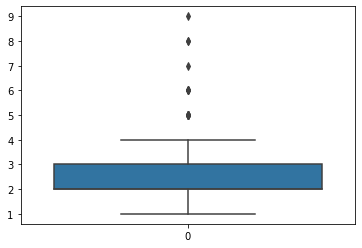

In [277]:
# Box Plot

import seaborn as sns
sns.boxplot(data=ans['Bathrooms'])

In [278]:
sum(ans['Bathrooms'] >=5) # properties having more than 5 bathrooms are outliers

19

- 19 properties have more than 5 bathrooms

<AxesSubplot:>

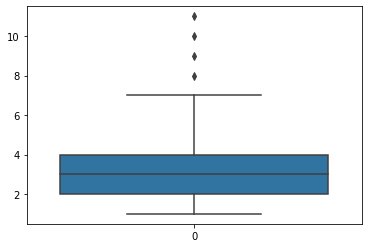

In [279]:
sns.boxplot(data=ans['Bedrooms'])

In [280]:
sum(ans['Bedrooms'] >= 8 ) # Properties with more than 8 bedrooms are considered as outliers

4

- 4 properties have more than 8 bedrooms 

In [281]:
ans = ans[(ans['Bathrooms'] < 5) & (ans['Bedrooms'] < 8)]

In [282]:
len(ans)

479

In [283]:
ans.head()

,index,URL,County,Address,Zip Code,Bedrooms,Bathrooms,Area (sqft),Time on Zillow (hrs),Views,Saves,Price ($),Zestimate Price ($),Estimated Monthly Cost ($)
0,0,https://www.zillow.com/homedetails/111-S-Lake-...,Contra Costa,111 S Lake Dr,94509,3.0,2.0,1676.0,7,75,1,570000,502900,2882
1,1,https://www.zillow.com/homedetails/810-W-6th-S...,Contra Costa,810 W 6th St,94509,2.0,1.0,862.0,7,30,0,465000,405700,2100
2,2,https://www.zillow.com/homedetails/1021-Mornin...,Contra Costa,1021 Morning Glory Way,94561,3.0,3.0,2161.0,9,112,8,700000,743700,3170
3,3,https://www.zillow.com/homedetails/4003-Cresce...,Contra Costa,4003 Crescent Ct,94509,5.0,3.0,2333.0,10,98,6,799000,753200,3162
4,4,https://www.zillow.com/homedetails/3625-Mounta...,Contra Costa,3625 Mountaire Dr,94509,3.0,2.0,1878.0,13,227,11,625000,619800,2900


In [285]:
ans.to_excel('Final Zillow Houses Dataset.xlsx',index=False)